# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [19]:
# If on colab, uncomment the following lines

#!wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [24]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,313,96,52,104,222,67,9,198,33,23,163,217,589,226,67,12,20,192,201
1,148,90,43,72,172,59,8,154,42,19,144,174,360,158,61,15,9,203,209
2,710,102,54,98,201,61,6,225,29,25,165,246,766,231,79,9,14,188,187
3,172,94,45,81,166,67,9,145,46,19,147,164,313,179,66,11,14,194,202
4,833,92,46,83,154,56,6,160,41,20,148,185,382,184,71,10,5,186,191
5,339,87,41,73,158,64,7,151,44,19,138,175,341,152,73,3,8,190,194
6,607,86,39,62,129,59,6,116,57,17,135,137,203,145,64,7,9,199,204
7,320,105,54,100,220,69,10,221,30,25,170,232,718,202,73,0,13,187,199
8,699,93,47,83,165,60,7,167,40,20,147,197,417,201,73,12,4,187,192
9,218,83,44,68,144,61,8,147,45,19,143,170,325,180,74,1,1,185,191


Methods `describe` and `info` deliver some useful information.

In [25]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,431.526412,93.715847,44.870674,81.947177,168.438980,61.540984,8.469945,169.020036,40.879781,20.588342,147.859745,188.894353,441.074681,174.816029,72.612022,6.402550,12.746812,188.967213,195.526412
std,242.340492,8.279082,6.232394,15.721891,33.177833,7.978796,4.554366,33.366653,7.840572,2.598064,14.540417,31.510277,177.446661,32.809515,7.637112,4.948648,9.103401,6.195332,7.434000
min,1.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,230.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,167.000000,319.000000,149.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,427.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,637.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,589.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,52.000000,261.000000,59.000000,28.000000,186.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [26]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [27]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Initialize StandardScaler for feature standardization 
# and OrdinalEncoder for target encoding
standartiser = StandardScaler()
encoder = OrdinalEncoder()

# Standardize the X data
X_train_std = standartiser.fit_transform(X_train_pd)
X_test_std = standartiser.transform(X_test)

# Encode the y data
y_train_enc = encoder.fit_transform(y_train[:, np.newaxis])[:, 0]
y_test_enc = encoder.transform(y_test[:, np.newaxis])[:, 0]

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

F1 score: 0.716
Accuracy: 0.7239


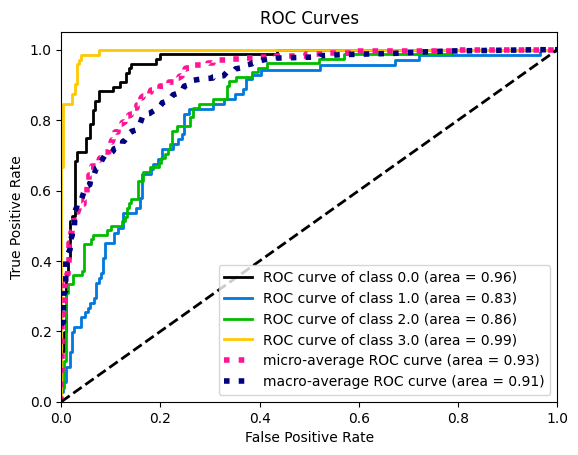

In [37]:
### YOUR CODE HERE
### YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from scikitplot.metrics import plot_roc

import warnings
warnings.filterwarnings('ignore')

# Define the logistic regression model with specified hyperparameters
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1],
    'class_weight': ['balanced', None],
}

# Perform RandomizedSearchCV with cross-validation
rs = RandomizedSearchCV(log_reg, param_distributions=param_grid, cv=3, scoring='f1_macro')
rs.fit(X_train_std, y_train_enc)

# Use the best estimator from RandomizedSearchCV
best_log_reg = rs.best_estimator_
best_log_reg_params = rs.best_params_

# Evaluate the model
y_pred = best_log_reg.predict(X_test_std)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_log_reg.predict_proba(X_test_std)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

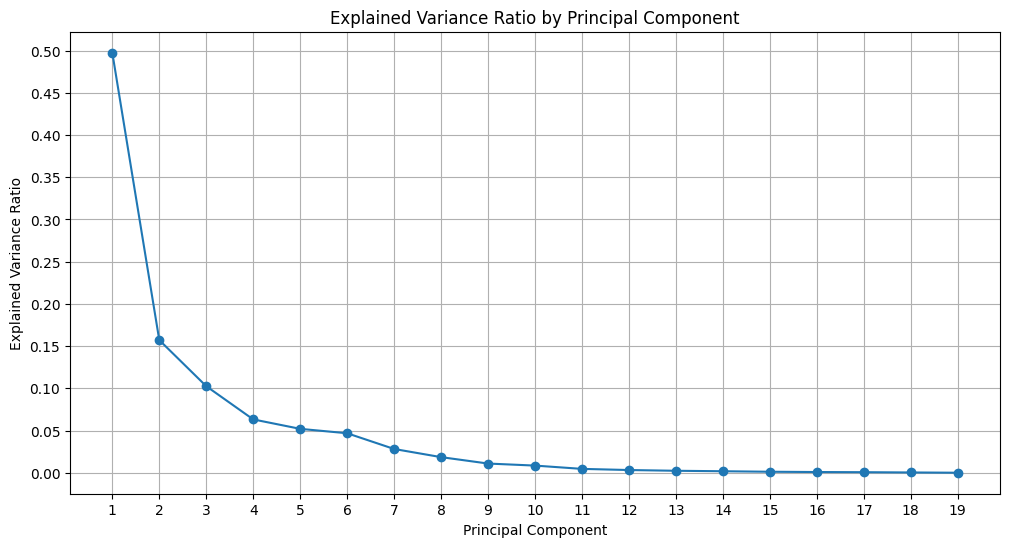

In [38]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to the training data
pca = PCA()
pca.fit(X_train_std)

# Calculate the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
fig, axes = plt.subplots(figsize=(12, 6))
axes.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
axes.set_xlabel('Principal Component')
axes.set_ylabel('Explained Variance Ratio')
axes.set_title('Explained Variance Ratio by Principal Component')
axes.set_xticks(range(1, len(explained_var_ratio) + 1))
axes.set_yticks([0 + 0.05*i for i in range(11)])
axes.grid(True)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [39]:
### YOUR CODE HERE

# Data is already normalized
# It means that previous plot can be used to select optimal numper of componens

def get_optimal_components(explained_var_ratio: np.ndarray, 
                           explained_var_perc: float=0.95) -> int:
    
    total_explained_var = 0
    n = 0
    
    while total_explained_var < explained_var_perc:
        total_explained_var += explained_var_ratio[n]
        n += 1
        
    return n
    

# Transform the train and test data with the chosen number of components
n_components = get_optimal_components(explained_var_ratio)

print(f"Got optimal explained variance ration with {n_components} components")

pca = PCA(n_components)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

Got optimal explained variance ration with 8 components


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

F1 score: 0.6033
Accuracy: 0.6229


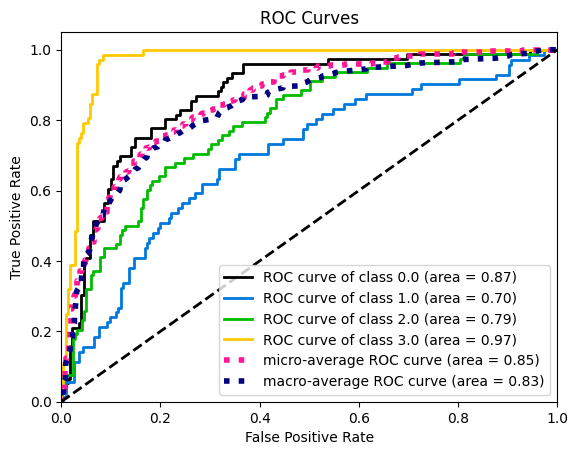

In [40]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model with specified hyperparameters
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500]
}

# Perform RandomizedSearchCV with cross-validation
gs = GridSearchCV(log_reg, param_grid=param_grid, cv=3, scoring='f1_macro')
gs.fit(X_train_pca, y_train_enc)

# Use the best estimator from RandomizedSearchCV
best_log_reg = gs.best_estimator_
best_lr_params = gs.best_params_

# Evaluate the model
y_pred = best_log_reg.predict(X_test_pca)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_log_reg.predict_proba(X_test_pca)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

F1 score: 0.5853
Accuracy: 0.5825


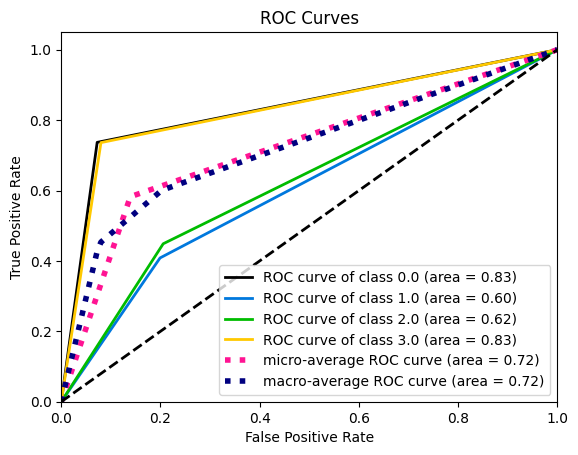

In [41]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

# Define the hyperparameter grid for max_depth
param_grid = {'max_depth': [3, 5, 7, 10, 15]}

# Perform GridSearchCV with cross-validation
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='f1_macro')
gs.fit(X_train_pca, y_train_enc)

# Use the best estimator from GridSearchCV
best_dt = gs.best_estimator_
best_dt_params = gs.best_params_

# Evaluate the model
y_pred = best_dt.predict(X_test_pca)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_dt.predict_proba(X_test_pca)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

F1 score: 0.7188
Accuracy: 0.7239


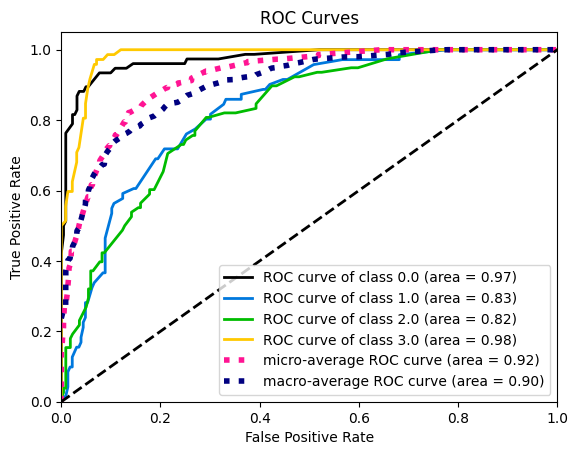

In [42]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier

# Define the hyperparameter grid for max_depth
param_grid = {
    'estimator': [best_log_reg, best_dt],
    'n_estimators': range(2, 101, 5),
}

# Perform GridSearchCV with cross-validation
gs = GridSearchCV(BaggingClassifier(), param_grid, cv=3, scoring='f1_macro')
gs.fit(X_train_pca, y_train_enc)

# Use the best estimator from GridSearchCV
best_bagging = gs.best_estimator_
best_bagging_params = gs.best_params_

# Evaluate the model
y_pred = best_bagging.predict(X_test_pca)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_bagging.predict_proba(X_test_pca)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')

In [43]:
ensemble_sizes = np.arange(2, 101, 5)

# Initialize a Bagging ensemble of logistic regressions
bagging_lr_f1_scores = []
bagging_lr_accuracy_scores = []

for n in ensemble_sizes:
    bagging_lr = BaggingClassifier(base_estimator=best_log_reg, n_estimators=n, random_state=42)
    bagging_lr.fit(X_train_pca, y_train_enc)
    y_pred_bagging_lr = bagging_lr.predict(X_test_pca)
    f1_bagging_lr = f1_score(y_test_enc, y_pred_bagging_lr, average='macro')
    accuracy_bagging_lr = accuracy_score(y_test_enc, y_pred_bagging_lr)
    bagging_lr_f1_scores.append(f1_bagging_lr)
    bagging_lr_accuracy_scores.append(accuracy_bagging_lr)

In [44]:
# Initialize a Bagging ensemble of decision trees
bagging_dt_f1_scores = []
bagging_dt_accuracy_scores = []

for n in ensemble_sizes:
    bagging_dt = BaggingClassifier(base_estimator=best_dt, n_estimators=n, random_state=42)
    bagging_dt.fit(X_train_pca, y_train_enc)
    y_pred_bagging_dt = bagging_dt.predict(X_test_pca)
    f1_bagging_dt = f1_score(y_test_enc, y_pred_bagging_dt, average='macro')
    accuracy_bagging_dt = accuracy_score(y_test_enc, y_pred_bagging_dt)
    bagging_dt_f1_scores.append(f1_bagging_dt)
    bagging_dt_accuracy_scores.append(accuracy_bagging_dt)

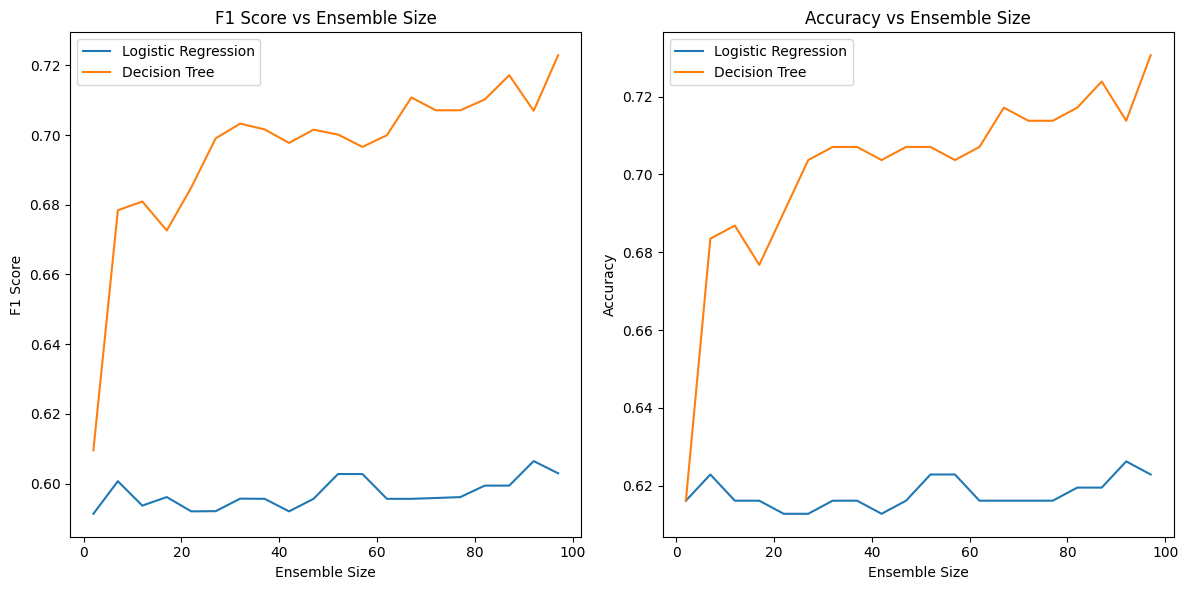

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, bagging_lr_f1_scores, label='Logistic Regression')
plt.plot(ensemble_sizes, bagging_dt_f1_scores, label='Decision Tree')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score vs Ensemble Size')

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, bagging_lr_accuracy_scores, label='Logistic Regression')
plt.plot(ensemble_sizes, bagging_dt_accuracy_scores, label='Decision Tree')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Ensemble Size')

plt.tight_layout()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

F1 score: 0.7054
Accuracy: 0.7172


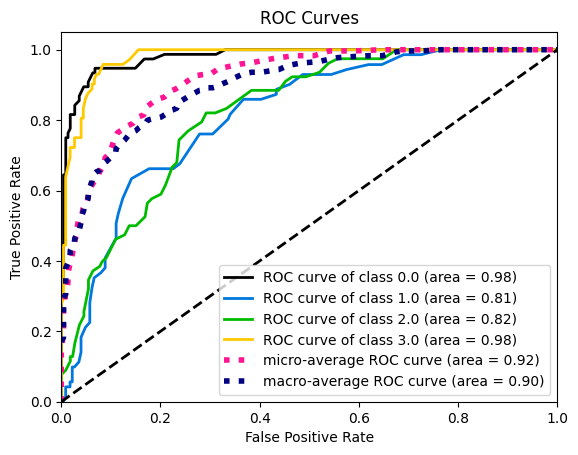

In [46]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

param_grid = {
    'n_estimators': range(2, 101, 5),
}

# Perform GridSearchCV with cross-validation
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1_macro')
gs.fit(X_train_pca, y_train_enc)

# Use the best estimator from GridSearchCV
best_rf = gs.best_estimator_
best_rf_params = gs.best_params_

# Evaluate the model
y_pred = best_rf.predict(X_test_pca)
f1 = f1_score(y_test_enc, y_pred, average='macro')
accuracy = accuracy_score(y_test_enc, y_pred)

# Plot ROC curve
y_pred_proba = best_rf.predict_proba(X_test_pca)
plot_roc(y_test_enc, y_pred_proba);

print(f'F1 score: {f1:.4}')
print(f'Accuracy: {accuracy:.4}')

In [47]:
# Initialize lists to store F1 scores and accuracy
rf_f1_scores = []
rf_accuracy_scores = []

# Define the range of number of trees
n_trees_range = range(1, 101, 5)

for n_trees in n_trees_range:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train_pca, y_train_enc)
    y_pred_rf = rf.predict(X_test_pca)
    f1_rf = f1_score(y_test_enc, y_pred_rf, average='macro')
    accuracy_rf = accuracy_score(y_test_enc, y_pred_rf)
    rf_f1_scores.append(f1_rf)
    rf_accuracy_scores.append(accuracy_rf)

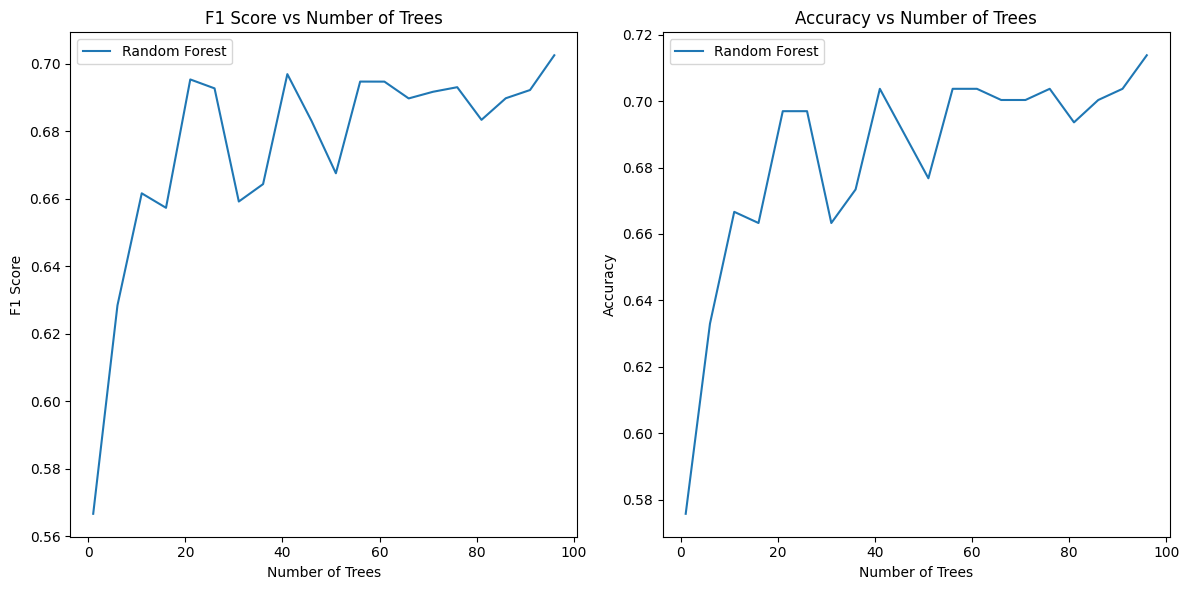

In [48]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_trees_range, rf_f1_scores, label='Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score vs Number of Trees')

plt.subplot(1, 2, 2)
plt.plot(n_trees_range, rf_accuracy_scores, label='Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Number of Trees')

plt.tight_layout()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [50]:
# YOUR CODE HERE

# Split the training data into 10 equal parts
num_parts = 10
train_sizes = np.arange(1, num_parts + 1)
accuracies = {'Logistic Regression': [], 'Decision Tree': [], 'Random Forest': []}
f1_scores = {'Logistic Regression': [], 'Decision Tree': [], 'Random Forest': []}

# n_samples = len(X_train_pca)
# random_inds = np.random.choice(n_samples, n_samples, replace=False)
# X_train_pca = X_train_pca[random_inds]
# y_train_enc = y_train_enc[random_inds]

for size in train_sizes:
    # Combine the first size parts for training
    
    X_train_combined = np.concatenate([X_part[:size] for X_part in np.array_split(X_train_pca, 10)])
    y_train_combined = np.concatenate([y_part[:size] for y_part in np.array_split(y_train_enc, 10)])

    # Train models
    log_reg = LogisticRegression(**best_lr_params)  # Add optimal hyperparameters
    log_reg.fit(X_train_combined, y_train_combined)
    dt = DecisionTreeClassifier(**best_dt_params)  # Add optimal hyperparameters
    dt.fit(X_train_combined, y_train_combined)
    rf = RandomForestClassifier(**best_rf_params)  # Add optimal hyperparameters
    rf.fit(X_train_combined, y_train_combined)

    # Predict on test set
    y_pred_log_reg = log_reg.predict(X_test_pca)
    y_pred_dt = dt.predict(X_test_pca)
    y_pred_rf = rf.predict(X_test_pca)

    # Calculate accuracy and f1 scores
    accuracies['Logistic Regression'].append(accuracy_score(y_test_enc, y_pred_log_reg))
    accuracies['Decision Tree'].append(accuracy_score(y_test_enc, y_pred_dt))
    accuracies['Random Forest'].append(accuracy_score(y_test_enc, y_pred_rf))

    f1_scores['Logistic Regression'].append(f1_score(y_test_enc, y_pred_log_reg, average='macro'))
    f1_scores['Decision Tree'].append(f1_score(y_test_enc, y_pred_dt, average='macro'))
    f1_scores['Random Forest'].append(f1_score(y_test_enc, y_pred_rf, average='macro'))

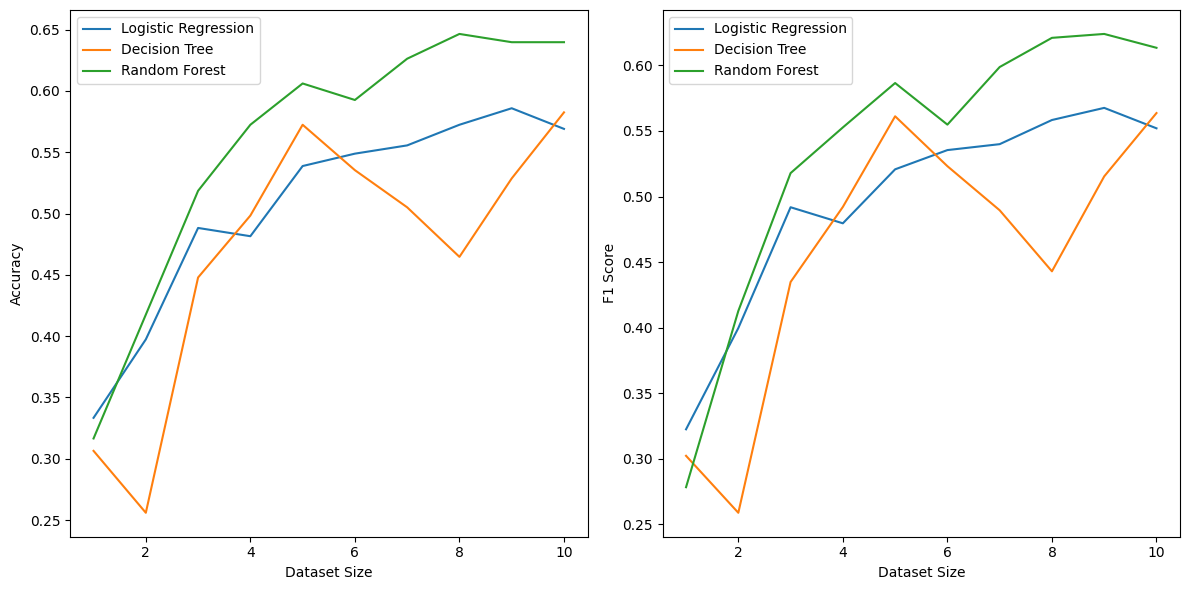

In [51]:
# Build a plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, accuracies['Logistic Regression'], label='Logistic Regression')
plt.plot(train_sizes, accuracies['Decision Tree'], label='Decision Tree')
plt.plot(train_sizes, accuracies['Random Forest'], label='Random Forest')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, f1_scores['Logistic Regression'], label='Logistic Regression')
plt.plot(train_sizes, f1_scores['Decision Tree'], label='Decision Tree')
plt.plot(train_sizes, f1_scores['Random Forest'], label='Random Forest')
plt.xlabel('Dataset Size')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()